In [1]:
import os
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import warnings
from copy import deepcopy
import scipy
import random
from sklearn.neighbors import NearestNeighbors

In [2]:
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

In [3]:
def dist(a,b):
    return np.linalg.norm(a-b)

In [4]:
random 100 points
x = np.zeros([50,2])
x[:,0] = np.random.uniform(0.00,100.00,50)
x[:,1] = np.random.uniform(0.00,100.00,50)
x

In [4]:
x = np.array([[ 43.60193044,  87.39491363],
       [ 81.9290237 ,  40.83102805],
       [ 78.76914877,  22.02647689],
       [ 16.16441515,  59.99510453],
       [ 40.19178726,  46.17210731],
       [ 71.0014435 ,  98.25126363],
       [ 47.07314995,  97.30881677],
       [ 92.02520728,  82.41281236],
       [ 34.38713063,  65.35574296],
       [ 71.61506076,  91.28754073],
       [ 49.67114135,   3.24704176],
       [ 28.73282417,  48.74153125],
       [ 27.2884754 ,  25.6839164 ],
       [ 27.7768188 ,  34.33790469],
       [ 86.34737891,  50.7673117 ],
       [ 16.21722215,   2.77652374],
       [ 79.80309661,  34.46344822],
       [ 59.7054293 ,  94.47639451],
       [ 56.65731173,  22.37289703],
       [ 24.98416091,  46.30324155],
       [ 51.11503537,  94.6759556 ],
       [  6.10970525,  39.28283245],
       [ 12.3897041 ,  95.72728891],
       [ 47.22829451,  40.44405577],
       [ 71.45362931,  41.99839814],
       [  4.67247945,  72.17824552],
       [ 94.45203128,  91.72052527],
       [ 58.55608459,   6.97829599],
       [ 96.60504031,  39.47552244],
       [  6.81889906,  79.34774706],
       [ 82.80019815,  37.63289182],
       [ 14.40943535,  88.64701602],
       [  3.22133448,  77.5847233 ],
       [ 55.42796483,  53.45328774],
       [ 42.47549373,  66.21943596],
       [ 94.67096157,  59.67520035],
       [ 37.55122269,  17.8268646 ],
       [ 63.22244682,  13.2989283 ],
       [ 89.46209971,  61.44582705],
       [ 55.68177263,   4.35596846],
       [ 95.27287005,  63.76451511],
       [ 76.97115462,  80.19381054],
       [ 75.29586815,  52.90407055],
       [ 22.16823961,  11.28230332],
       [ 29.23945654,  54.79851388],
       [ 39.72825814,  55.03739796],
       [ 21.62869319,  72.19709092],
       [ 92.60020217,   8.64174249],
       [ 95.89670462,  86.56486252],
       [ 98.94248385,  88.11227138]])
fin_chrom = np.array([[ 92.02520728,  82.41281236],
       [ 22.16823961,  11.28230332],
       [ 95.89670462,  86.56486252],
       [ 71.45362931,  41.99839814],
       [ 71.61506076,  91.28754073],
       [ 92.60020217,   8.64174249],
       [  4.67247945,  72.17824552],
       [ 47.07314995,  97.30881677],
       [ 27.7768188 ,  34.33790469],
       [ 49.67114135,   3.24704176],
       [ 37.55122269,  17.8268646 ],
       [ 96.60504031,  39.47552244],
       [ 89.46209971,  61.44582705],
       [ 43.60193044,  87.39491363],
       [ 78.76914877,  22.02647689],
       [ 21.62869319,  72.19709092],
       [ 28.73282417,  48.74153125],
       [ 14.40943535,  88.64701602],
       [ 76.97115462,  80.19381054],
       [ 16.16441515,  59.99510453],
       [ 47.22829451,  40.44405577],
       [  6.10970525,  39.28283245],
       [ 42.47549373,  66.21943596],
       [ 58.55608459,   6.97829599],
       [ 82.80019815,  37.63289182],
       [ 55.42796483,  53.45328774],
       [ 59.7054293 ,  94.47639451],
       [ 56.65731173,  22.37289703]])

In [14]:
#to find number of clusters, k
#initialize 1000000 points(x_t) inside the 100x100 box
#check if point in x_t lies inside the circle(of point in x)

x_t = np.zeros([100000,2])
x_t[:,0] = np.random.uniform(0.00,100.00,100000)
x_t[:,1] = np.random.uniform(0.00,100.00,100000)
count = 0
store = scipy.spatial.distance.cdist(x_t,x,metric='euclidean')
dist_tempo = 0.00
for i in range(len(x_t)):
    min_dist_index = np.argmin(store[i])
    dist_tempo = dist(x[min_dist_index],x_t[i])
    if (dist_tempo <= 10):
        count = count + 1

cov_area = (count / 100000.00) * 10000.00   #total area = 100*100, total points deployed = 1,000,000
cov_area

k_new = cov_area / (math.pi*100.00)

In [15]:
k_new

25.127064105462253

In [17]:
#initiate k random centroids over the data set
k = 21
# c = np.zeros([k,2])
# c[:,0] = np.random.uniform(0.00,100.00,k)
# c[:,1] = np.random.uniform(0.00,100.00,k)

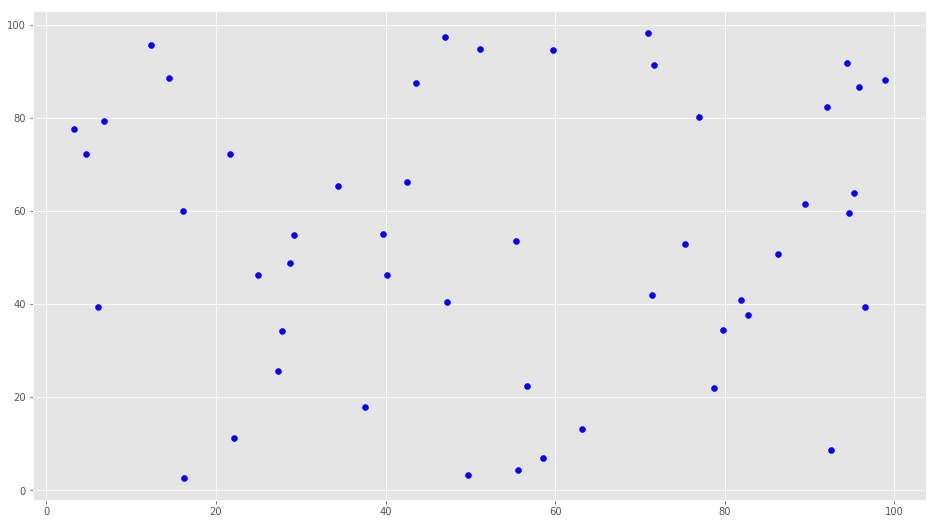

In [18]:
#plot data and initial centroids
plt.scatter(x[:,0],x[:,1],c='b')
#plt.scatter(c[:,0],c[:,1],marker = '*', c='red', s=250)
plt.show()

In [19]:
def scorer(chrom_temp):
    cnt = 0
    store_values = scipy.spatial.distance.cdist(x_t,chrom_temp,metric='euclidean')
    temp_dist = 0.00
    for i in range(len(x_t)):
        min_dist_idx = np.argmin(store_values[i])
        temp_dist = dist(chrom_temp[min_dist_idx],x_t[i])
        if (temp_dist <= 10):
            cnt = cnt + 1
    return ((cnt/100000.00) * cov_area)

In [22]:
n_chrom = 500
chrom = np.zeros([n_chrom,k,2])

for i1 in range(n_chrom):
    g = random.sample(x, k)
    chrom[i1] = deepcopy(g)

chrom[1]

array([[ 27.7768188 ,  34.33790469],
       [ 21.62869319,  72.19709092],
       [ 94.67096157,  59.67520035],
       [ 75.29586815,  52.90407055],
       [ 58.55608459,   6.97829599],
       [ 81.9290237 ,  40.83102805],
       [ 22.16823961,  11.28230332],
       [ 98.94248385,  88.11227138],
       [ 43.60193044,  87.39491363],
       [ 14.40943535,  88.64701602],
       [ 34.38713063,  65.35574296],
       [ 76.97115462,  80.19381054],
       [ 29.23945654,  54.79851388],
       [ 82.80019815,  37.63289182],
       [ 96.60504031,  39.47552244],
       [ 92.60020217,   8.64174249],
       [ 79.80309661,  34.46344822],
       [ 12.3897041 ,  95.72728891],
       [ 39.72825814,  55.03739796],
       [ 24.98416091,  46.30324155],
       [ 37.55122269,  17.8268646 ]])

In [24]:
fitness = np.zeros(n_chrom)

In [25]:
for i1 in range(n_chrom):
    fitness[i1] = scorer(chrom[i1])
fitness

array([ 3835.961766,  3803.833593,  3449.713239,  3576.173517,
        3895.402833,  3481.99929 ,  3214.159263,  3945.529098,
        3832.725267,  3634.588377,  3479.788998,  3699.791991,
        3797.913168,  3839.514021,  4073.726034,  3786.230196,
        3606.959727,  3274.231842,  3461.711967,  3744.629343,
        3405.823155,  3885.535458,  3518.31123 ,  3930.451749,
        3749.6025  ,  3258.444042,  3603.012777,  3559.35951 ,
        3764.127276,  3723.236874,  3335.014872,  3446.397801,
        3605.538825,  3546.72927 ,  3521.942424,  3704.686209,
        3667.821696,  4080.593727,  3940.477002,  3516.100938,
        3897.21843 ,  3936.056418,  3379.536468,  3651.323445,
        3652.744347,  3451.686714,  3547.992294,  3572.937018,
        3193.87194 ,  3647.850129,  3573.647469,  3564.727362,
        3760.180326,  3448.05552 ,  3339.830151,  3884.114556,
        3405.270582,  3380.799492,  3507.891282,  3776.994333,
        3790.177146,  3451.923531,  3715.106157,  3681.

In [27]:
max(fitness)

4242.9712500000005

In [59]:
gen = 0
while(gen<1000):
    chrom_s = random.sample(chrom, 2)
    chrom_s1 = deepcopy(chrom_s[0])
    chrom_s2 = deepcopy(chrom_s[1])
    crossover_prob = 0.9
    random_prob = random.uniform(0.0,1.0)
    if (random_prob < crossover_prob):
        if (k%2 == 0):
            n = (k/2)
        else:
            n = (k+1)/2
        crossover_array = random.sample(range(1,k),n)
        crossover_array.sort()
        h = 0;
        while ((h+1) < len(crossover_array)):
            ini = crossover_array[h]
            ter = crossover_array[h+1]
            for h1 in range(ini,ter):
                temp_chr = chrom_s1[h1]
                chrom_s1[h1] = chrom_s2[h1]
                chrom_s2[h1] = temp_chr
            h = h+2
        chrom_c1 = deepcopy(chrom_s1)
        chrom_c2 = deepcopy(chrom_s2)
    else:
        chrom_c1 = deepcopy(chrom_s1)
        chrom_c2 = deepcopy(chrom_s2)
    
    #mutation
    mutation_prob = 0.19
    random_prob_2 = random.uniform(0.0,1.0)
    if(random_prob_2 < mutation_prob):
        #mutation happens
        rand_number_1 = random.uniform(0.0,1.0)
        to_add_sub = random.uniform(0.0,1.0) #random value between 0 and 1 to add/sub
        if (rand_number_1 < 0.5):
            #add a random value to a random gene in the chromosome
            gene_number = random.choice(range(0,k))
            chrom_c1[gene_number][0] += to_add_sub
            chrom_c1[gene_number][1] += to_add_sub
            chrom_c2[gene_number][0] += to_add_sub
            chrom_c2[gene_number][1] += to_add_sub
        else:
            #sub a random value from a random gene in the chromosome
            gene_number = random.choice(range(0,k))
            chrom_c1[gene_number][0] -= to_add_sub
            chrom_c1[gene_number][1] -= to_add_sub
            chrom_c2[gene_number][0] -= to_add_sub
            chrom_c2[gene_number][1] -= to_add_sub
        chrom_m1 = deepcopy(chrom_c1)
        chrom_m2 = deepcopy(chrom_c2)
    else:
        #no mutation
        chrom_m1 = deepcopy(chrom_c1)
        chrom_m2 = deepcopy(chrom_c2)
    
    #replacement
    if (scorer(chrom_m1) < scorer(chrom_m2)):
        ch_1 = deepcopy(chrom_m1)
        ch_2 = deepcopy(chrom_m2)
    if (scorer(chrom_m2) < scorer(chrom_m1)):
        ch_1 = deepcopy(chrom_m2)
        ch_2 = deepcopy(chrom_m1)
    
    fit_temp = 100000
    least_id_1 = np.argmin(fitness)
    for i in range(n_chrom):
        if ((fitness[i] < fit_temp) and (fitness[i] > fitness[least_id_1])):
            fit_temp = fitness[i]
            least_id_2 = i
        
    if (fitness[least_id_2] < scorer(ch_1)):
        chrom[least_id_1] = deepcopy(ch_1)
        fitness[least_id_1] = scorer(ch_1)
        chrom[least_id_2] = deepcopy(ch_2)
        fitness[least_id_2] = scorer(ch_2)
#     elif (scorer(ch_2) < fitness[least_id_1]):
#         chrom[least_id_1] = deepcopy(chrom[least_id_1])
#         chrom[least_id_2] = deepcopy(chrom[least_id_2])
    elif (fitness[least_id_1] < scorer(ch_1)) and (scorer(ch_1) < fitness[least_id_2]) and (fitness[least_id_2] < scorer(ch_2)):
        chrom[least_id_2] = deepcopy(ch_1)
        fitness[least_id_2] = scorer(ch_1)
    elif (scorer(ch_1) < fitness[least_id_1]) and (fitness[least_id_1] < scorer(ch_2)) and (scorer(ch_2) < fitness[least_id_2]):
        chrom[least_id_1] = deepcopy(ch_2)
        fitness[least_id_1] = scorer(ch_2)
    elif (scorer(ch_1) < fitness[least_id_1]) and (fitness[least_id_2] < scorer(ch_2)):
        chrom[least_id_2] = deepcopy(chrom[least_id_1])
        fitness[least_id_2] = fitness[least_id_1]
        chrom[least_id_1] = deepcopy(ch_1)
        fitness[least_id_1] = scorer(ch_1)
    elif (fitness[least_id_1] < scorer(ch_1)) and (scorer(ch_2) < fitness[least_id_2]):
        chrom[least_id_2] = deepcopy(ch_1)
        fitness[least_id_2] = scorer(ch_1)
    
    gen = gen + 1

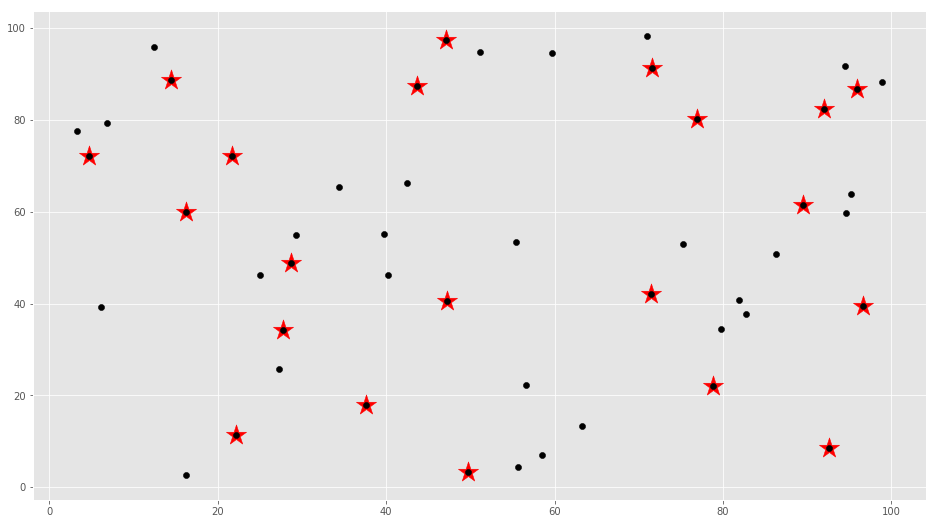

In [60]:
#get index with max fitness
index_max_fit = np.argmax(fitness)
#get chromosome corresponding to that max fitness
final_chromosome = chrom[index_max_fit]
#print best chromosome out of the array
plt.scatter(final_chromosome[:,0], final_chromosome[:,1], c = 'red', marker = '*', s= 450)
plt.scatter(x[:,0],x[:,1],c='black',s=150, marker='.')
plt.show()

In [61]:
final_score = scorer(final_chromosome)
final_score

5450.4

In [62]:
final_score / cov_area

0.7531921950140954

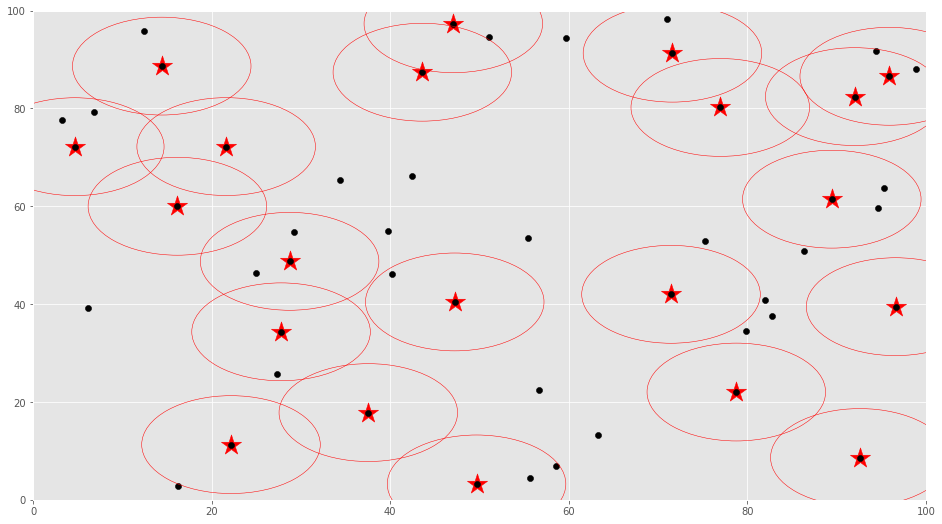

In [78]:
circle1 = plt.Circle(final_chromosome[0], 10.0, color='r',fill=False)
circle2 = plt.Circle(final_chromosome[1], 10.0, color='r',fill=False)
circle3 = plt.Circle(final_chromosome[2], 10.0, color='r',fill=False)
circle4 = plt.Circle(final_chromosome[3], 10.0, color='r',fill=False)
circle5 = plt.Circle(final_chromosome[4], 10.0, color='r',fill=False)
circle6 = plt.Circle(final_chromosome[5], 10.0, color='r',fill=False)
circle7 = plt.Circle(final_chromosome[6], 10.0, color='r',fill=False)
circle8 = plt.Circle(final_chromosome[7], 10.0, color='r',fill=False)
circle9 = plt.Circle(final_chromosome[8], 10.0, color='r',fill=False)
circle10 = plt.Circle(final_chromosome[9], 10.0, color='r',fill=False)
circle11 = plt.Circle(final_chromosome[10], 10.0, color='r',fill=False)
circle12 = plt.Circle(final_chromosome[11], 10.0, color='r',fill=False)
circle13 = plt.Circle(final_chromosome[12], 10.0, color='r',fill=False)
circle14 = plt.Circle(final_chromosome[13], 10.0, color='r',fill=False)
circle15 = plt.Circle(final_chromosome[14], 10.0, color='r',fill=False)
circle16 = plt.Circle(final_chromosome[15], 10.0, color='r',fill=False)
circle17 = plt.Circle(final_chromosome[16], 10.0, color='r',fill=False)
circle18 = plt.Circle(final_chromosome[17], 10.0, color='r',fill=False)
circle19 = plt.Circle(final_chromosome[18], 10.0, color='r',fill=False)
circle20 = plt.Circle(final_chromosome[19], 10.0, color='r',fill=False)
circle21 = plt.Circle(final_chromosome[20], 10.0, color='r',fill=False)
ax = plt.gca()
ax.cla()
ax.set_xlim((0, 100))
ax.set_ylim((0, 100))
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle4)
ax.add_artist(circle5)
ax.add_artist(circle6)
ax.add_artist(circle7)
ax.add_artist(circle8)
ax.add_artist(circle9)
ax.add_artist(circle10)
ax.add_artist(circle11)
ax.add_artist(circle12)
ax.add_artist(circle13)
ax.add_artist(circle14)
ax.add_artist(circle15)
ax.add_artist(circle16)
ax.add_artist(circle17)
ax.add_artist(circle18)
ax.add_artist(circle19)
ax.add_artist(circle20)
ax.add_artist(circle21)
plt.scatter(final_chromosome[:,0], final_chromosome[:,1], c = 'red', marker = '*', s= 450)
plt.scatter(x[:,0],x[:,1],c='black',s=150, marker='.')
plt.show()

In [156]:
x[37]

array([ 63.22244682,  13.2989283 ])

In [157]:
# manually find 7 extra points to increase coverage
extra = np.array([x[21],x[34],x[30],x[37],x[33],x[17],x[18]])
extra

array([[  6.10970525,  39.28283245],
       [ 42.47549373,  66.21943596],
       [ 82.80019815,  37.63289182],
       [ 63.22244682,  13.2989283 ],
       [ 55.42796483,  53.45328774],
       [ 59.7054293 ,  94.47639451],
       [ 56.65731173,  22.37289703]])

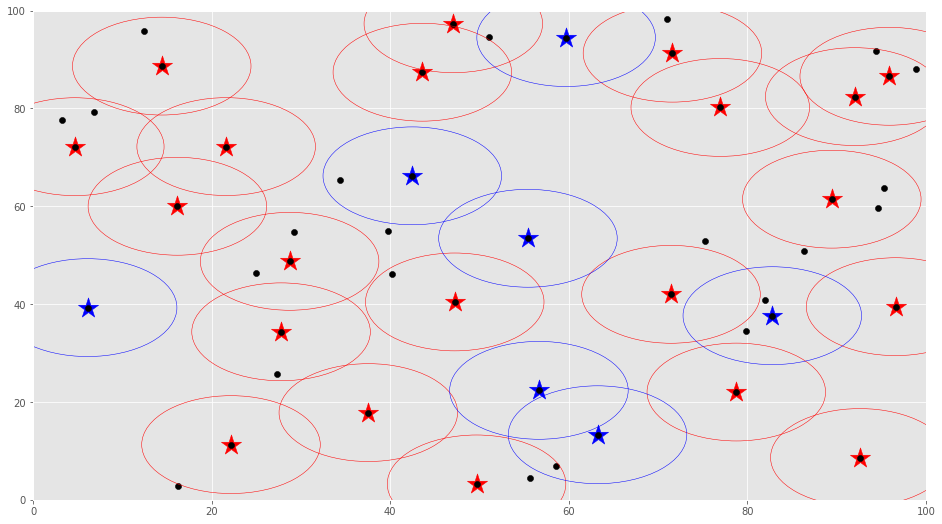

In [158]:
circle1 = plt.Circle(final_chromosome[0], 10.0, color='r',fill=False)
circle2 = plt.Circle(final_chromosome[1], 10.0, color='r',fill=False)
circle3 = plt.Circle(final_chromosome[2], 10.0, color='r',fill=False)
circle4 = plt.Circle(final_chromosome[3], 10.0, color='r',fill=False)
circle5 = plt.Circle(final_chromosome[4], 10.0, color='r',fill=False)
circle6 = plt.Circle(final_chromosome[5], 10.0, color='r',fill=False)
circle7 = plt.Circle(final_chromosome[6], 10.0, color='r',fill=False)
circle8 = plt.Circle(final_chromosome[7], 10.0, color='r',fill=False)
circle9 = plt.Circle(final_chromosome[8], 10.0, color='r',fill=False)
circle10 = plt.Circle(final_chromosome[9], 10.0, color='r',fill=False)
circle11 = plt.Circle(final_chromosome[10], 10.0, color='r',fill=False)
circle12 = plt.Circle(final_chromosome[11], 10.0, color='r',fill=False)
circle13 = plt.Circle(final_chromosome[12], 10.0, color='r',fill=False)
circle14 = plt.Circle(final_chromosome[13], 10.0, color='r',fill=False)
circle15 = plt.Circle(final_chromosome[14], 10.0, color='r',fill=False)
circle16 = plt.Circle(final_chromosome[15], 10.0, color='r',fill=False)
circle17 = plt.Circle(final_chromosome[16], 10.0, color='r',fill=False)
circle18 = plt.Circle(final_chromosome[17], 10.0, color='r',fill=False)
circle19 = plt.Circle(final_chromosome[18], 10.0, color='r',fill=False)
circle20 = plt.Circle(final_chromosome[19], 10.0, color='r',fill=False)
circle21 = plt.Circle(final_chromosome[20], 10.0, color='r',fill=False)
circle22 = plt.Circle(extra[0], 10.0, color='b',fill=False)
circle23 = plt.Circle(extra[1], 10.0, color='b',fill=False)
circle24 = plt.Circle(extra[2], 10.0, color='b',fill=False)
circle25 = plt.Circle(extra[3], 10.0, color='b',fill=False)
circle26 = plt.Circle(extra[4], 10.0, color='b',fill=False)
circle27 = plt.Circle(extra[5], 10.0, color='b',fill=False)
circle28 = plt.Circle(extra[6], 10.0, color='b',fill=False)

ax = plt.gca()
ax.cla()
ax.set_xlim((0, 100))
ax.set_ylim((0, 100))
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle4)
ax.add_artist(circle5)
ax.add_artist(circle6)
ax.add_artist(circle7)
ax.add_artist(circle8)
ax.add_artist(circle9)
ax.add_artist(circle10)
ax.add_artist(circle11)
ax.add_artist(circle12)
ax.add_artist(circle13)
ax.add_artist(circle14)
ax.add_artist(circle15)
ax.add_artist(circle16)
ax.add_artist(circle17)
ax.add_artist(circle18)
ax.add_artist(circle19)
ax.add_artist(circle20)
ax.add_artist(circle21)
ax.add_artist(circle22)
ax.add_artist(circle23)
ax.add_artist(circle24)
ax.add_artist(circle25)
ax.add_artist(circle26)
ax.add_artist(circle27)
ax.add_artist(circle28)
plt.scatter(final_chromosome[:,0], final_chromosome[:,1], c = 'red', marker = '*', s= 450)
plt.scatter(extra[:,0], extra[:,1], c = 'blue', marker = '*', s= 450)
plt.scatter(x[:,0],x[:,1],c='black',s=150, marker='.')
plt.show()

In [159]:
#to find coverage of new clustering
fin_chrom = deepcopy(final_chromosome)
fin_chrom = np.append(fin_chrom,[x[21]],axis = 0)
fin_chrom = np.append(fin_chrom,[x[34]],axis = 0)
fin_chrom = np.append(fin_chrom,[x[27]],axis = 0)
fin_chrom = np.append(fin_chrom,[x[30]],axis = 0)
fin_chrom = np.append(fin_chrom,[x[33]],axis = 0)
fin_chrom = np.append(fin_chrom,[x[17]],axis = 0)
fin_chrom = np.append(fin_chrom,[x[18]],axis = 0)
fin_chrom

array([[ 92.02520728,  82.41281236],
       [ 22.16823961,  11.28230332],
       [ 95.89670462,  86.56486252],
       [ 71.45362931,  41.99839814],
       [ 71.61506076,  91.28754073],
       [ 92.60020217,   8.64174249],
       [  4.67247945,  72.17824552],
       [ 47.07314995,  97.30881677],
       [ 27.7768188 ,  34.33790469],
       [ 49.67114135,   3.24704176],
       [ 37.55122269,  17.8268646 ],
       [ 96.60504031,  39.47552244],
       [ 89.46209971,  61.44582705],
       [ 43.60193044,  87.39491363],
       [ 78.76914877,  22.02647689],
       [ 21.62869319,  72.19709092],
       [ 28.73282417,  48.74153125],
       [ 14.40943535,  88.64701602],
       [ 76.97115462,  80.19381054],
       [ 16.16441515,  59.99510453],
       [ 47.22829451,  40.44405577],
       [  6.10970525,  39.28283245],
       [ 42.47549373,  66.21943596],
       [ 58.55608459,   6.97829599],
       [ 82.80019815,  37.63289182],
       [ 55.42796483,  53.45328774],
       [ 59.7054293 ,  94.47639451],
 

In [160]:
def fin_scorer(chrom_temp):    #same as scorer above
    cnt = 0
    store_values = scipy.spatial.distance.cdist(x_t,chrom_temp,metric='euclidean')
    temp_dist = 0.00
    for i in range(len(x_t)):
        min_dist_idx = np.argmin(store_values[i])
        temp_dist = dist(chrom_temp[min_dist_idx],x_t[i])
        if (temp_dist <= 10):
            cnt = cnt + 1
    return ((cnt/1000000.00) * 10000.00)

In [161]:
ekdum_final = fin_scorer(fin_chrom)
ekdum_final

6986.21

In [165]:
ekdum_final / cov_area

0.8834592218559167